In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
dataset = pd.read_csv('fashion-mnist_train.csv')
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [4]:
from sklearn.svm import SVC

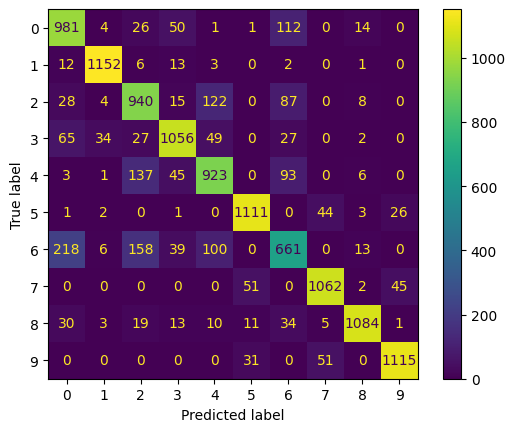

Accuracy: 0.8404166666666667


In [5]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

In [6]:
dataset = pd.read_csv('loan.csv')
dataset[' education'] = dataset[' education'].map({' Graduate': True, ' Not Graduate': False})
dataset[' self_employed'] = dataset[' self_employed'].map({' Yes': True, ' No': False})
dataset[' loan_status'] = dataset[' loan_status'].map({' Approved': True, ' Rejected': False})

y = dataset.iloc[:, -1].values
X = dataset.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
pipeline = make_pipeline(StandardScaler(), SVC())

# Definir los parámetros que deseas ajustar
param_grid = {
    'svc__C': [0.1, 1, 10, 100],  # Parámetro de regularización
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
    'svc__degree': [2, 3, 4],  # Grado del polinomio (solo para kernel='poly')
    'svc__gamma': ['scale', 'auto', 0.1, 1],  # Coeficiente del kernel ('scale' y 'auto' para kernel='rbf')
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Mejores parámetros: {'svc__C': 1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Precisión en el conjunto de prueba: 0.9438202247191011


In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
 
# DATA PREPARATION
df = pd.read_csv("loan.csv")
y = df[df.CARDHLDR == 1].DEFAULT.values 
x = preprocessing.scale(df[df.CARDHLDR == 1].ix[:, 2:12], axis = 0) 
 
# DEFINE MODEL AND PERFORMANCE MEASURE
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# GRID SEARCH FOR 20 COMBINATIONS OF PARAMETERS
grid_list = {"C": np.arange(2, 10, 2),
             "gamma": np.arange(0.1, 1, 0.2)}
 
grid_search = GridSearchCV(mdl, param_grid = grid_list, n_jobs = 4, cv = 3, scoring = auc) 
grid_search.fit(x, y) 
grid_search.cv_results_
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(x, y) 
rand_search.cv_results_

AttributeError: 'DataFrame' object has no attribute 'CARDHLDR'